In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
plt.style.use('seaborn-white')

### 1.loading the dataset

In [35]:
multiclass_test = pd.read_csv(r'C:\Users\Fra\Documents\SDS\SML\DATASET PROGETTO\multiclass_test.csv',header= 0)
multiclass_training = pd.read_csv(r'C:\Users\Fra\Documents\SDS\SML\DATASET PROGETTO\multiclass_training.csv', header= 0)

In [18]:
y_test = multiclass_test.iloc[:,17395]
x_train = np.array(multiclass_training.drop(['label','Unnamed: 0','DepMap_ID'], axis = 1))
y_train = multiclass_training.iloc[:,17395]
x_test = np.array(multiclass_test.drop(['label','DepMap_ID','Unnamed: 0'], axis = 1))

### 2.Random Forest with the same parameters as in the RF.blood model

In [36]:
rf = RandomForestClassifier(random_state = 2311, n_jobs = -1,
                    min_samples_leaf = 4, n_estimators = 504,
                    min_samples_split= 10, max_leaf_nodes= 35,
                    max_depth = 48, class_weight = "balanced",
                    bootstrap = True, oob_score = True)

In [37]:
rf.fit(x_train, y_train)
print('Training score: ', rf.score(x_train, y_train))
print('Test score: ', rf.score(x_test, y_test))

Training score:  0.9852941176470589
Test score:  0.5245098039215687


In [58]:
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)
print(f'The accuracy of the model is {round(accuracy_score(y_test, y_pred), 3)*100} %')

The accuracy of the model is 52.5 %


In [59]:
y_pred

array([1, 1, 1, 3, 3, 4, 4, 4, 4, 8, 4, 7, 1, 2, 7, 1, 1, 3, 2, 1, 9, 1,
       7, 7, 6, 4, 6, 9, 4, 4, 1, 4, 9, 8, 5, 7, 7, 1, 9, 4, 4, 4, 7, 4,
       7, 3, 7, 1, 3, 3, 2, 7, 4, 6, 1, 4, 2, 3, 4, 4, 4, 4, 2, 1, 2, 1,
       6, 9, 1, 4, 3, 1, 2, 1, 4, 4, 4, 1, 1, 9, 1, 9, 1, 7, 7, 6, 2, 4,
       1, 1, 1, 1, 9, 6, 6, 4, 6, 7, 9, 2, 3, 1, 7, 1, 9, 4, 6, 5, 4, 3,
       9, 9, 2, 1, 3, 3, 3, 3, 2, 2, 4, 4, 1, 9, 3, 9, 1, 2, 6, 1, 1, 4,
       3, 4, 1, 3, 5, 1, 3, 3, 6, 4, 4, 6, 4, 6, 3, 1, 9, 1, 1, 2, 1, 5,
       3, 2, 1, 6, 1, 1, 1, 9, 9, 6, 4, 2, 6, 1, 4, 3, 4, 6, 2, 6, 7, 6,
       6, 6, 4, 7, 2, 4, 4, 8, 1, 9, 5, 1, 4, 4, 3, 2, 4, 4, 2, 2, 3, 4,
       6, 6, 6, 4, 4, 1], dtype=int64)

In [43]:
#Create the vectors that contains the Cancers chosen (Cancer_Type2) and the one observed (Cancer_Type)
Cancer_Type = [ "Eye", "Gastrointestinal","Genitals","Muscle-Bone","Neuro","Breast","Head_Neck","Blood",
               "Genitourinary", "Lung"] 

In [60]:
#Change the name of the coloumns of the class matrix created through get_dummies 
# using more meaningful names
y_test_dummies = y_test_dummies.set_axis(Cancer_Type, axis = 1)
y_pred_dummies = y_pred_dummies.set_axis(Cancer_Type, axis= 1)
#y_train = y_train.set_axis(Cancer_Type, axis= 1)

In [45]:
 multilabel_confusion_matrix(y_test_dummies, y_pred_dummies)

array([[[201,   0],
        [  3,   0]],

       [[138,  17],
        [ 20,  29]],

       [[172,  12],
        [ 11,   9]],

       [[168,  11],
        [ 12,  13]],

       [[149,  28],
        [  8,  19]],

       [[195,   2],
        [  4,   3]],

       [[176,  13],
        [  4,  11]],

       [[188,   2],
        [  0,  14]],

       [[188,   2],
        [ 13,   1]],

       [[164,  10],
        [ 22,   8]]], dtype=int64)

In [62]:
y_test_dummies

,Gastrointestinal,Genitals,Muscle-Bone,Neuro,Breast,Head_Neck,Blood,Genitourinary,Lung,Eye
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
199,0,0,0,0,0,0,1,0,0,0
200,0,0,0,0,0,0,1,0,0,0
201,0,0,0,0,1,0,0,0,0,0
202,0,0,0,0,0,0,1,0,0,0


In [46]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                fontsize = 15,
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)

In [63]:
y_pred

array([1, 1, 1, 3, 3, 4, 4, 4, 4, 8, 4, 7, 1, 2, 7, 1, 1, 3, 2, 1, 9, 1,
       7, 7, 6, 4, 6, 9, 4, 4, 1, 4, 9, 8, 5, 7, 7, 1, 9, 4, 4, 4, 7, 4,
       7, 3, 7, 1, 3, 3, 2, 7, 4, 6, 1, 4, 2, 3, 4, 4, 4, 4, 2, 1, 2, 1,
       6, 9, 1, 4, 3, 1, 2, 1, 4, 4, 4, 1, 1, 9, 1, 9, 1, 7, 7, 6, 2, 4,
       1, 1, 1, 1, 9, 6, 6, 4, 6, 7, 9, 2, 3, 1, 7, 1, 9, 4, 6, 5, 4, 3,
       9, 9, 2, 1, 3, 3, 3, 3, 2, 2, 4, 4, 1, 9, 3, 9, 1, 2, 6, 1, 1, 4,
       3, 4, 1, 3, 5, 1, 3, 3, 6, 4, 4, 6, 4, 6, 3, 1, 9, 1, 1, 2, 1, 5,
       3, 2, 1, 6, 1, 1, 1, 9, 9, 6, 4, 2, 6, 1, 4, 3, 4, 6, 2, 6, 7, 6,
       6, 6, 4, 7, 2, 4, 4, 8, 1, 9, 5, 1, 4, 4, 3, 2, 4, 4, 2, 2, 3, 4,
       6, 6, 6, 4, 4, 1], dtype=int64)

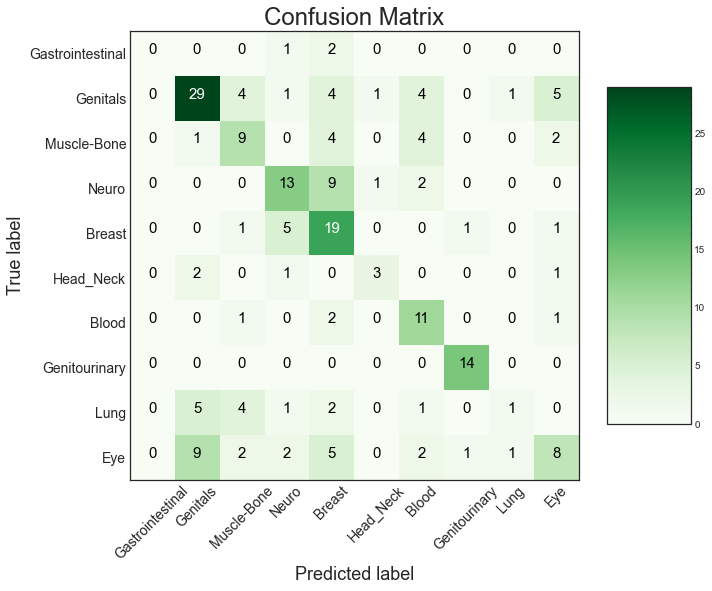

In [65]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')

In [66]:
out = cross_validate(rf, x_train, y_train, cv = 5, n_jobs = -1,
                scoring = 'accuracy', return_estimator = True)

In [67]:
x_train = multiclass_training.drop(['label','Unnamed: 0','DepMap_ID'], axis = 1)

In [68]:
feat_impo_all = []
for i, estimator in enumerate(out['estimator']):
    print("First 10 features sorted by their importance for model n. {}:".format(i+1))
    feat_impo = pd.DataFrame(estimator.feature_importances_,
                            index = x_train.columns,
                            columns = ['Importance{}'.format(i+1)]).sort_values('Importance{}'.format(i+1), ascending = False)
    print(feat_impo[:10])
    print('--------------------------------')

    feat_impo_all.append(feat_impo[feat_impo['Importance{}'.format(i+1)] > 0.001])

First 10 features sorted by their importance for model n. 1:
                Importance1
SOX10..6663.       0.002962
ZEB2..9839.        0.002904
CBFB..865.         0.002816
MYB..4602.         0.002696
PAX8..7849.        0.002692
MBNL1..4154.       0.002398
FERMT2..10979.     0.002359
SPDEF..25803.      0.002241
EP300..2033.       0.002023
MEF2C..4208.       0.002014
--------------------------------
First 10 features sorted by their importance for model n. 2:
                Importance2
MYB..4602.         0.004611
ZEB2..9839.        0.004027
SPDEF..25803.      0.002856
ZNF24..7572.       0.002839
CBFB..865.         0.002647
PAX8..7849.        0.002585
IKZF1..10320.      0.002363
SOX10..6663.       0.002255
MEF2C..4208.       0.002229
ARHGEF7..8874.     0.002123
--------------------------------
First 10 features sorted by their importance for model n. 3:
                Importance3
ZEB2..9839.        0.003829
PAX8..7849.        0.003679
MBNL1..4154.       0.003551
MYB..4602.         0.00

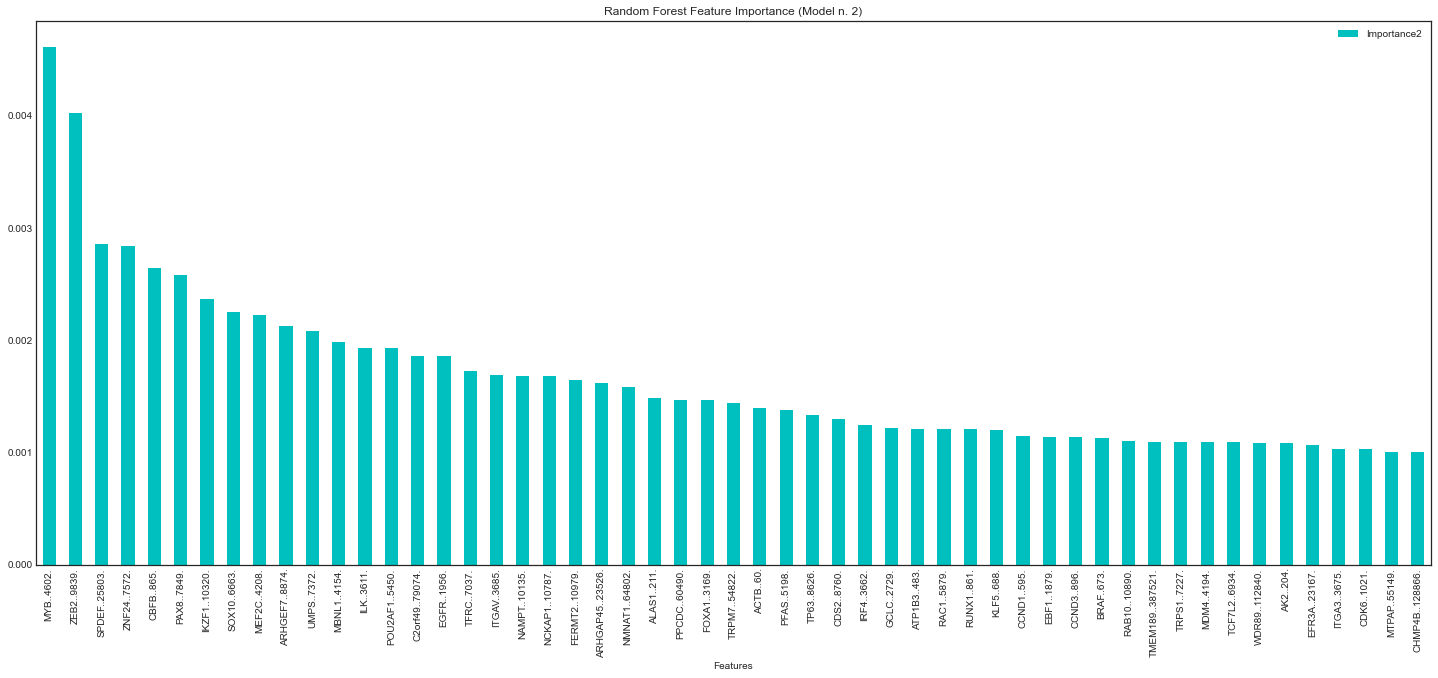

In [70]:
feat_impo_all[1].plot.bar(figsize = (25, 10), color = 'c')
plt.title('Random Forest Feature Importance (Model n. 2)')
plt.xlabel('Features')
plt.show()